# Employee Retention

## Goal

Employee turnover is a very costly problem for companies. The cost of replacing an employee if often larger than 100K USD, taking into account the time spent to interview and find a replacement, placement fees, sign-on bonuses and the loss of productivity for several months.

It is only natural then that data science has started being applied to this area. Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as planning new hiring in advance. This application of DS is sometimes called people analytics or people data science (if you see a job title: people data scientist, this is your job).


In this challenge, you have a data set with info about the employees and have to predict when employees are going to quit by understanding the main drivers of employee churn.


## Challenge Description

We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as average salary during her tenure, department, and years of experience.
As said above, the goal is to predict employee retention and understand its main drivers


In [34]:
#Data Analysis
import pandas as pd
import numpy as np
import missingno as msno

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
data = pd.read_csv('../employee_retention.csv')
data.pop('Unnamed: 0')
data.describe()

employee_id    company_id     seniority         salary
count  3.470200e+04  34702.000000  34702.000000   34463.000000
mean   6.466667e+05      4.023370     10.056625  100280.585004
std    3.337653e+05      2.911201      9.355505   87322.502536
min    3.600000e+01      1.000000      0.000000    5000.000000
25%    3.529228e+05      1.000000      0.000000    9302.000000
50%    7.063230e+05      3.000000      8.000000   88000.000000
75%    1.001324e+06      6.000000     18.000000  158000.000000
max    1.009999e+06     12.000000     99.000000  408000.000000

In [36]:
print(set(data.dept))
print(set(data.company_id))

{'design', 'sales', 'temp_contractor', 'engineer', 'data_science', 'marketing', 'customer_service'}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


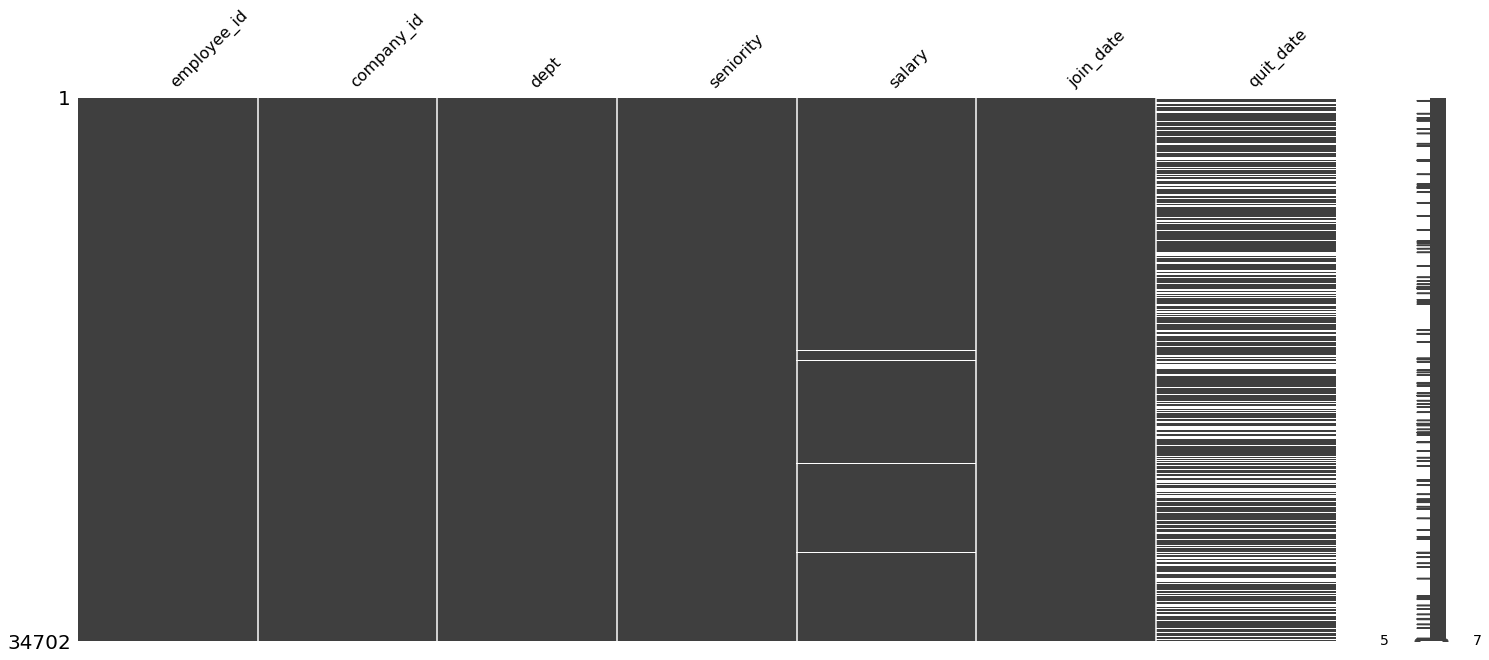

In [32]:
msno.matrix(data)

In [33]:
msno.bar(data)

## Salary by Company

In [37]:
plt.figure(figsize=(10,8))
#sns.violinplot(data=data, x = "company_id", y="salary")
sns.boxplot(data=data, x="company_id", y= "salary")

## Salary by Department

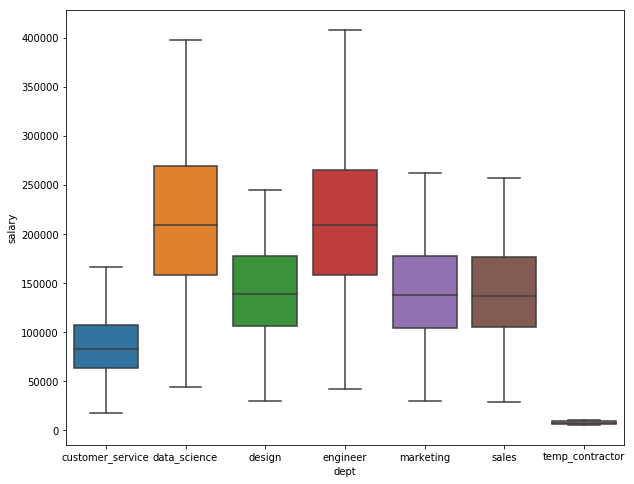

In [47]:
plt.figure(figsize=(10,8))
dept= list(set(data['dept']))
dept.sort()

sns.boxplot(data=data, x="dept", y="salary", order= dept)

## Salary by Seniority

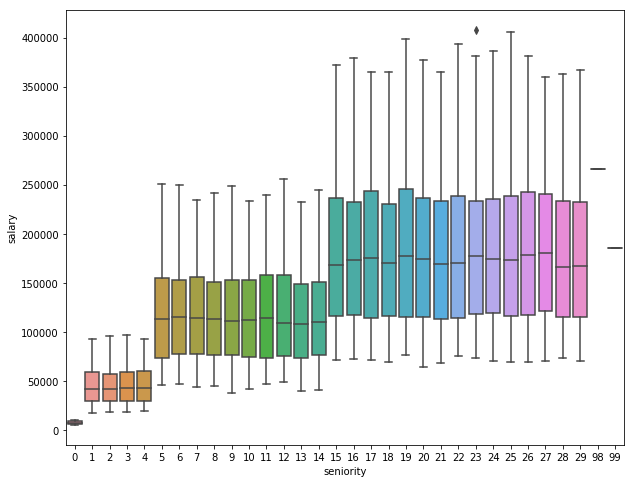

In [51]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data, x="seniority", y= "salary")

## Salary distribution across Seniority and Company

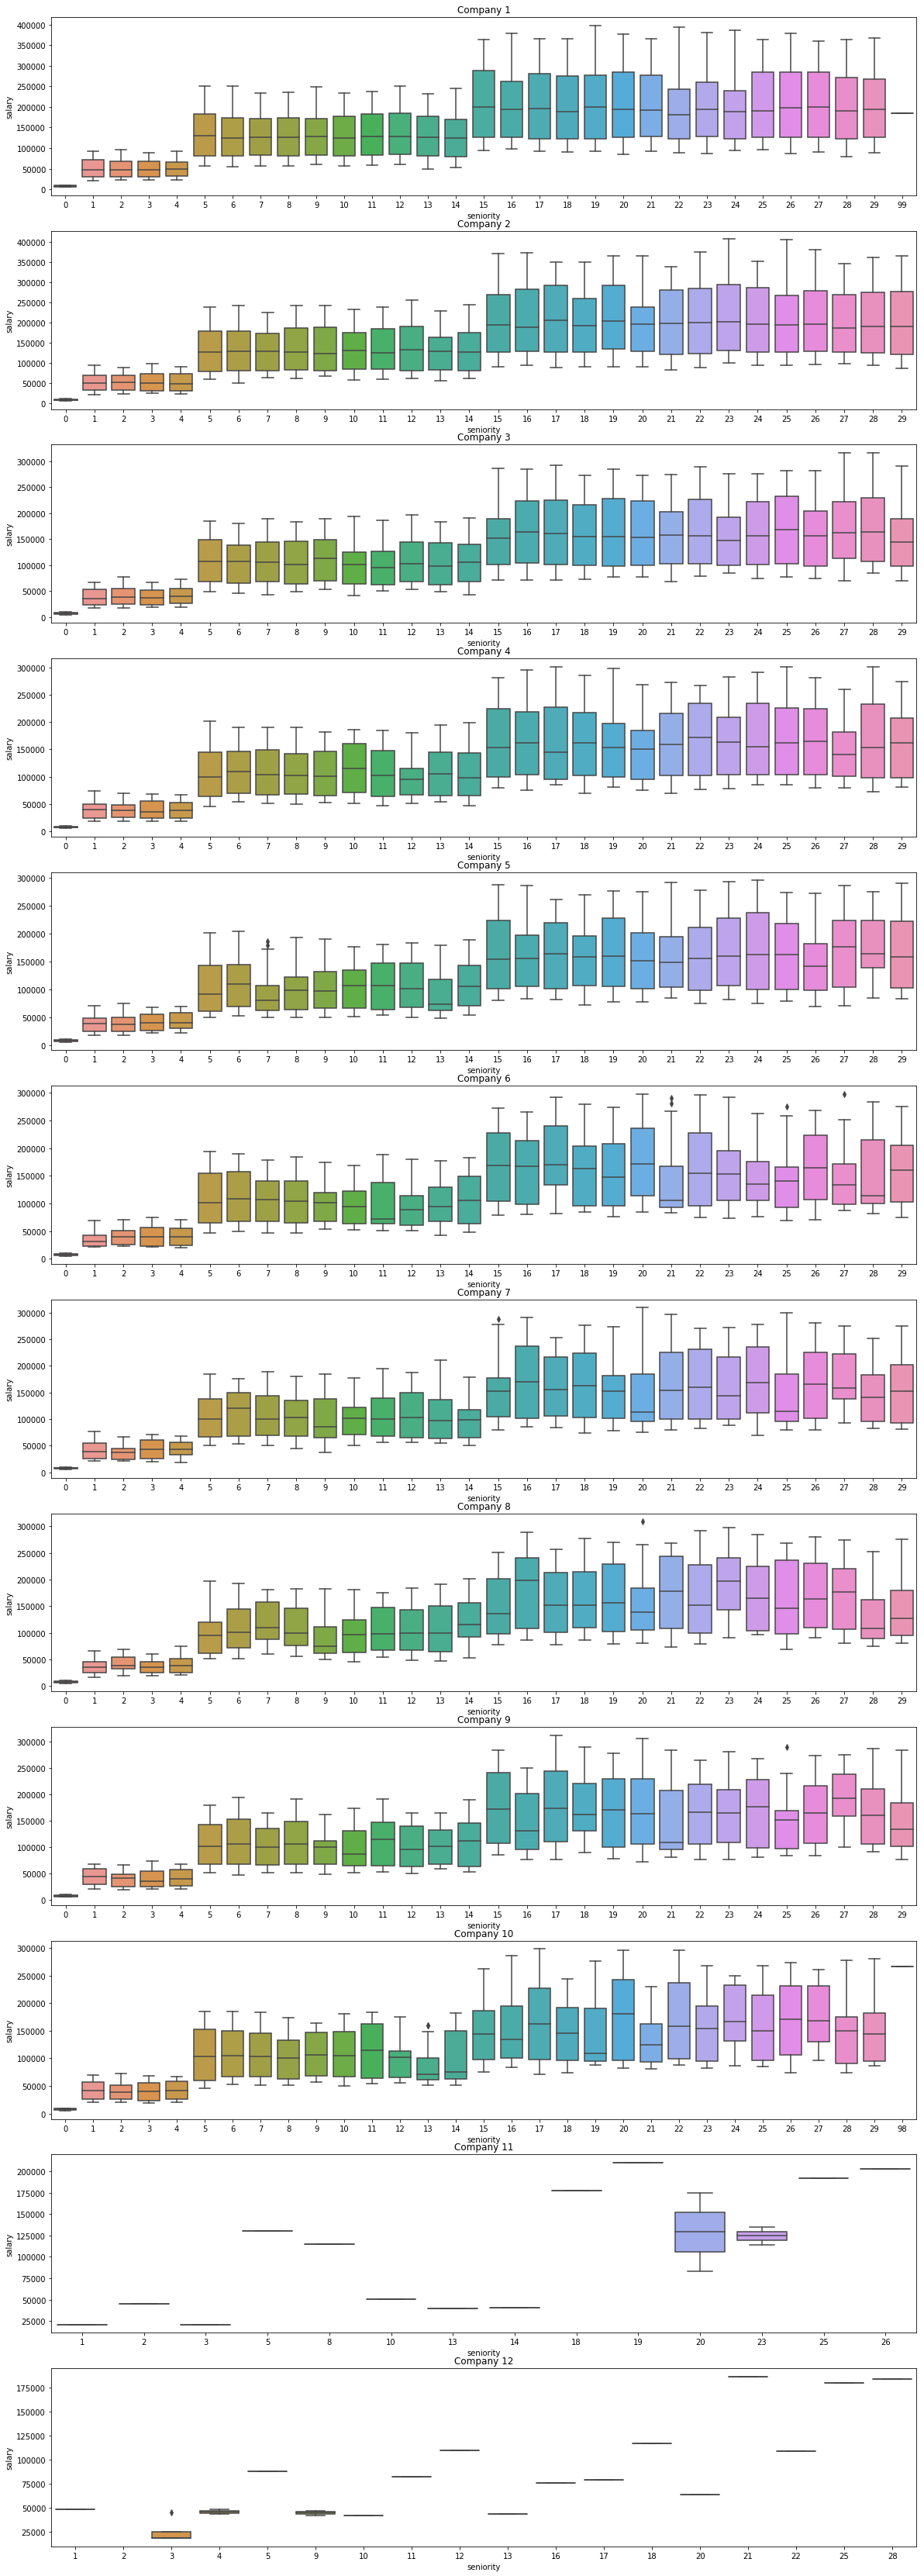

In [57]:
plt.figure(figsize=(20,60))
sns.boxplot(data=data, x = "seniority", y="salary")
for i in range(12):
    plt.subplot(12,1,i+1)
    sns.boxplot(data=data[data['company_id']== i+1], x="seniority", y="salary")
    plt.title("Company {}".format(i+1))

## Salary across Department and Companies

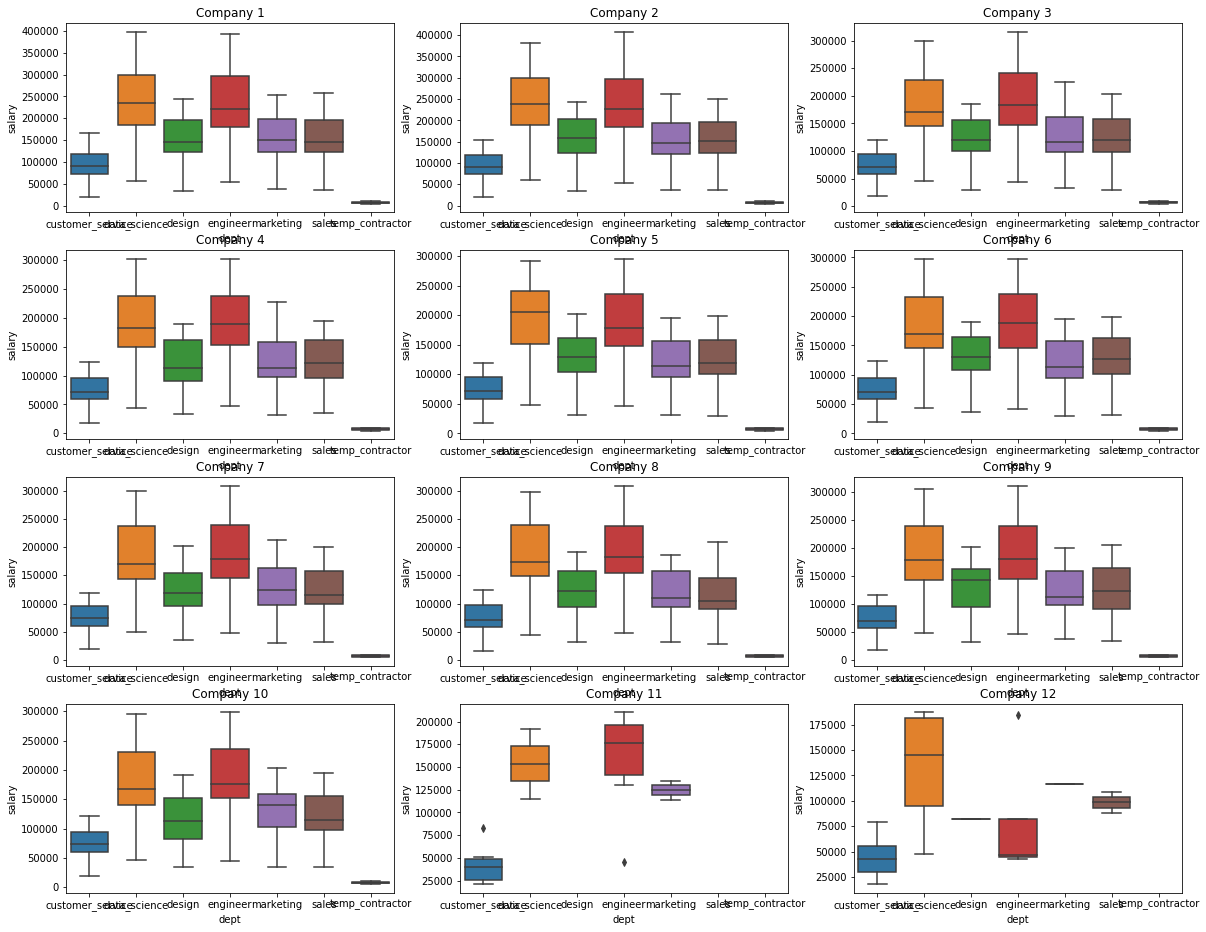

In [58]:
plt.figure(figsize=(20,16))
dept = list(set(data['dept']))
dept.sort()
for i in range(12):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=data[data['company_id']==i+1], x="dept", y="salary", order=dept)
    plt.title("Company {}".format(i+1))

## How many employees are there in each company?

Text(0.5, 1.0, 'Number of Employees at Each Company')

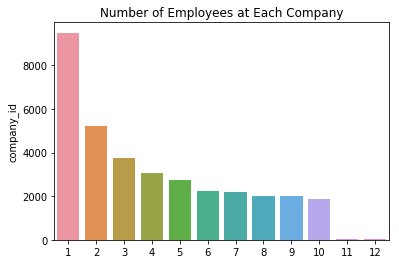

In [67]:
sns.barplot(x=list(range(1,13)), y= data.company_id.value_counts())
plt.title("Number of Employees at Each Company")


## Insights from EDA
    - Salary distribution is delineated by three buckets (0-4, 5-14, and 15-29)
    - Companies 1 and 2 offer the highest salaries
    - Salary distribution by department is consistent across companies
    - Data scientists + Engineers have the highest salaries// customer service, the lowest
    - Company 1 has the most employees (9501)

## Calculate time employee spent at each company using time stamps

In [74]:
join_timestamp= [pd.Timestamp(data['join_date'][i]) for i in range(len(data))]

In [77]:
quit_timestamp = []
for i in range(len(data)):
    try:
        ts= pd.Timestamp(data['quit_date'][i])
        quit_timestamp.append(ts)
    except:
        ts= pd.Timestamp('2015-12-14')
        quit_timestamp.append(ts)

In [81]:
data['join_timestamp'] = join_timestamp
data['quit_timestamp'] = quit_timestamp
data['in_company_for'] = [quit_timestamp[i] - join_timestamp[i] for i in range(len(data))]
ts= [data.in_company_for.values[i].astype('float64')/(60*60*24*1e9) for i in range(len(data))]
data['days_in_company'] = ts

In [87]:
quit = []
for i in range(len(data)):
    if data['days_in_company'][i] < 0:
        quit.append(0)
    else:
        quit.append(1)

data['quit_company'] = quit

In [88]:
data

employee_id  company_id              dept  seniority    salary  \
0          1001444           8   temp_contractor          0    5850.0   
1           388804           8            design         21  191000.0   
2           407990           3            design          9   90000.0   
3           120657           2          engineer         20  298000.0   
4          1006393           1   temp_contractor          0    8509.0   
5           287530           5         marketing         20  180000.0   
6           561043           3  customer_service         18  119000.0   
7           702479           7      data_science          7  140000.0   
8           545690          10      data_science         16  238000.0   
9           622587           5             sales         28  166000.0   
10          430126           2      data_science          3   77000.0   
11          838072           3      data_science         13  162000.0   
12          205557           8  customer_service         17  109000.0   
13          554514           1  customer_service          4   33000.0   
14           14751           7            design         18  162000.0   
15          602443           3             sales         16  150000.0   
16          488083           1          engineer          8       NaN   
17         1007464           7   temp_contractor          0    7748.0   
18         1002775           3   temp_contractor          0    7424.0   
19          581423           6         marketing          1   35000.0   
20         1000103           5   temp_contractor          0    9684.0   
21           34604           2            design         29  224000.0   
22         1008116           4   temp_contractor          0    9865.0   
23          182278           1             sales         19  179000.0   
24         1003092           2   temp_contractor          0    5459.0   
25          296069           2          engineer         16  308000.0   
26         1007778           7   temp_contractor          0    6749.0   
27          612255           7  customer_service          6   66000.0   
28           28269           2             sales          9  153000.0   
29          904543           2      data_science         17  314000.0   
...            ...         ...               ...        ...       ...   
34672       853660           1  customer_service          4   32000.0   
34673       609792           9          engineer         17  312000.0   
34674      1004479           1   temp_contractor          0    5473.0   
34675       387963           4          engineer         20  256000.0   
34676      1007217           5   temp_contractor          0    8007.0   
34677      1005065          10   temp_contractor          0    9228.0   
34678      1001318           2   temp_contractor          0    6610.0   
34679       601436           8          engineer         16  248000.0   
34680      1009815           2   temp_contractor          0    8597.0   
34681      1002205           6   temp_contractor          0    7269.0   
34682       388487           1             sales         12  142000.0   
34683      1002577           3   temp_contractor          0    6942.0   
34684       441323          12  customer_service          2       NaN   
34685        49028           1  customer_service         23  123000.0   
34686       319407           2  customer_service         15  127000.0   
34687       398026           8  customer_service         14   59000.0   
34688      1000332          10   temp_contractor          0    8950.0   
34689      1001449           2   temp_contractor          0    6559.0   
34690      1004318           8   temp_contractor          0    8404.0   
34691       963736           1         marketing         15  215000.0   
34692      1002402           9   temp_contractor          0    5233.0   
34693       759749           1            design         19  199000.0   
34694       484497           1  customer_service         10   780